Read in the data from [061-MICE](061-MICE.ipynb), fill in the Age values and move onto Feature Engineering round 2.


In [69]:
# Import libraries

import numpy as np
from numpy.random import random_integers
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from fancyimpute import MICE, SimpleFill, SoftImpute,IterativeSVD,MatrixFactorization

%matplotlib inline

print('Libraries Ready!')

Libraries Ready!


In [70]:
# read in the data from day 058...
df = pd.read_csv('/home/sophie/Python/notechain/Titanic/data/058_full.csv', header=0)


According to my investigation [here](064-Compare_imputations.ipynb) for a random forest classifier and the training set of data, there is no significant gain from using an imputation model any fancier than imputing the mean value for age. But anyways, lets look at the frequency distribution of age using differen imputation methods. 

In [71]:
# rename the dataframe
full = df.copy()

# Fill in age with the mean value
full['Age'].fillna(full['Age'].mean(), inplace = True)
len(full[full['Age'] == np.nan]) # no nans

0

#### Age imputed based on MICE

In [72]:
# Let's just check with filling in with MICE
# Load the full training and test dataset, saved to csv on day 61 - this is in a numbers-only matrix ready for MICE
df2 = pd.read_csv('/home/sophie/Python/notechain/Titanic/data/061_full.csv', header=0)

In [73]:
#change the dataframe into an array that MICE can handle (doesn't take dataframes)
fda = df2.as_matrix()

solver = MICE(verbose=0)

fdac = solver.complete(fda) # This works perfectly well.

# convert fdac back to dataframe

fullm = pd.DataFrame(fdac, columns = [x for x in list(df2)])

#### Age imputed based on fancyImputes most basic "mean" filler - purely for comparison with my own mean filler

In [74]:
# Check that simplefill gives the same as our mean age fill above.
solver = SimpleFill(fill_method = "mean")

fdac = solver.complete(fda) # This works perfectly well.

# convert fdac back to dataframe

fullsf = pd.DataFrame(fdac, columns = [x for x in list(df2)])

#### Age computed based on Sex, Pclass and Title

In [75]:
# lets get age filled by criteria based on 3 cols
# Load the full training and test dataset, saved to csv on day 61
full3cols = pd.read_csv('/home/sophie/Python/notechain/Titanic/data/064_full3cols.csv', header=0)

#### Compare all the different Age arrays

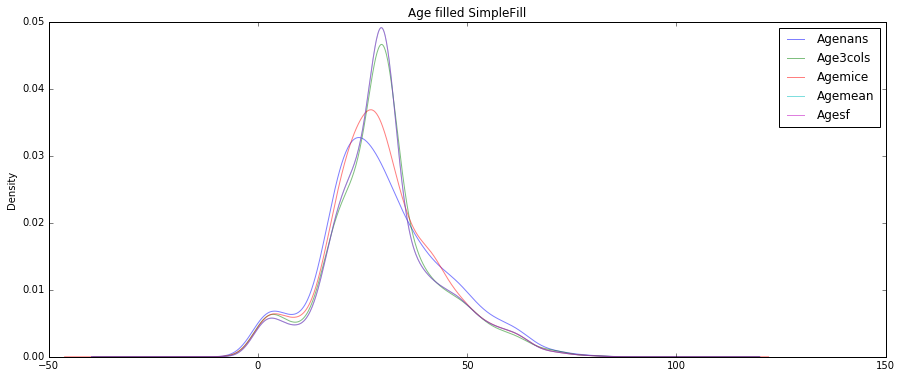

In [90]:
# Look at frequencies on one plot

df['Age'].plot.kde(alpha=0.5,  title = 'Age nans', figsize=(15,6), legend=True, label = 'Agenans')
full3cols['Age'].plot.kde(alpha=0.5,  title = 'Age filled 3 cols', legend=True, label = 'Age3cols')
fullm['Age'].plot.kde(alpha=0.5,  title = 'Age filled MICE', legend=True, label = 'Agemice')
full['Age'].plot.kde(alpha=0.5, title = 'Age filled mean', legend=True, label = 'Agemean')
fullsf['Age'].plot.kde(alpha=0.5, title = 'Age filled SimpleFill', legend=True, label = 'Agesf')

Mice does seem to be the closest in frequency distribution to the original data.

In [95]:
# So, we'll add MICE age to our dataframe which has all the other things we want, df
df['Age'] = fullm['Age']